# Koding Menggunakan meta-Deep Ai | with or without Quantum Computation

In [ ]:
# ============================
# By: Imam Cholissodin | imamcs@ub.ac.id
# Dosen Fakultas Ilmu Komputer (Filkom)
# Universitas Brawijaya (UB)
# Tgl 6 Oktober 2022, 
# Semoga Bermanfaat. Aamiin :D
# ====================================
# 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Buat Folder, misal "DIPA Penelitian 2022 - Koding Xtreme-GA" di Gdrive => utk Bahan paper ke-2
import os
path ="Penelitian_dan_Pengmas_2022/DIPA Penelitian 2022 - Koding Xtreme-GA"
os.chdir("/content/drive/My Drive")
if not os.path.exists(path):
  os.makedirs(path)
  #print('Path blm ada')
else:
  print('Path sdh ada')
os.chdir("/content/drive/My Drive/"+path)
!ls -l -a -i --block-size=K
!pwd

Path sdh ada
total 271K
438 -rw------- 1 root root   4K Oct  6 03:28 'Dataset Real untuk Alg Quantum meta-Deep Ai v2.05.csv'
437 -rw------- 1 root root 263K Oct  6 15:02 'draft Alg XtremeGA sebagai meta-Deep Ai v1.09.ipynb'
439 drwx------ 2 root root   4K Oct  6 13:09 'testing of convergence non rdd'
/content/drive/My Drive/Penelitian_dan_Pengmas_2022/DIPA Penelitian 2022 - Koding Xtreme-GA


In [ ]:
# start code part 1
# Komputasi dengan skema pada non pyspark RDD ----> Start :D
# ----------------------------------
# 
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
import humanize
from datetime import datetime, timezone
from time import gmtime, strftime
import pytz
import csv
from itertools import zip_longest
import random


# set atau get nilai parameter ELM dengan PySpark untuk inisialisasi
# my def 
def myrandfloat(mbaris,nkolom,lower,upper):
  #BatasRANDplusOne=10000
  BatasRANDplusOne=max(10000,2*np.math.ceil(upper))
  #mbaris=1
  #nkolom=1
  Rand_Sample=np.random.randint(BatasRANDplusOne,size=(mbaris,nkolom))
  min_Rand_Sample = 0
  max_Rand_Sample = BatasRANDplusOne - 1
  upper_boundary= upper
  lower_boundary= lower
  normalize_Rand_Sample_minMax=(((Rand_Sample-min_Rand_Sample)/(max_Rand_Sample-min_Rand_Sample))*(upper_boundary-lower_boundary))+lower_boundary
  return normalize_Rand_Sample_minMax
# end code part 1

## Koding dgn / tanpa DataFrame Pandas x numpy | non - PySpark RDD 

In [ ]:
# start code part 2 | dengan Koding non PySpark RDD 
# set param, misal dengan berikut (dengan dataset real untuk simulasi di komputer seperti konsep in silico):
# yang dapat digunakan untuk Alg. Quantum meta-Deep AI atau Xtreme-GA meta-Deep AI atau lainnya
file_input  	= 'file:///content/drive/My Drive/'+path+'/Dataset Real untuk Alg Quantum meta-Deep Ai v2.05.csv'
dir_output 	= 'file:///content/drive/My Drive/'+path+'/'
# activation function (af)
af		= "sigmoid"

import pandas as pd

#Load data by pandas
data_non_rdd = pd.read_csv(file_input)
data_non_rdd = data_non_rdd.apply(pd.to_numeric, errors='coerce')
data_non_rdd = data_non_rdd.fillna(0)

# get header atau nama-nama koom pada data
header_non_rdd = data_non_rdd.head(0) 

# get nama kolom fitur
byk_fitur_raw = 16
list_nama_kolom_fitur_by_non_rdd = list(header_non_rdd)[2:byk_fitur_raw+2]
print(list_nama_kolom_fitur_by_non_rdd)
byk_fitur_by_non_rdd = len(list_nama_kolom_fitur_by_non_rdd)
print('byk fitur = ', byk_fitur_by_non_rdd)

print()

# get nama kolom target
list_nama_kolom_target_by_non_rdd = list(header_non_rdd)[byk_fitur_raw+2:]
print(list_nama_kolom_target_by_non_rdd)
byk_target_by_non_rdd = len(list_nama_kolom_target_by_non_rdd)
print('byk target = ', byk_target_by_non_rdd)

#print(data.collect())

# set param utk non-command prompt dengan Pysspark RDD
# jumlah_hidden, misal = 5
jumlah_fitur  	= byk_fitur_by_non_rdd
jumlah_hidden 	= 5		

print()

# get raw_content_by_non_rdd
# untuk mengambil content tiap baris selain header 
# raw_content_by_non_rdd = data_rdd.zipWithIndex().filter(lambda kv: kv[1] > 0).keys()
raw_content_by_non_rdd = data_non_rdd.iloc[:, :]
# print('raw_content_by_non_rdd as array numpy')
# print(raw_content_by_non_rdd.iloc[:, 2:].values.astype(np.float32))

# print()

# get raw_fitur_by_non_rdd
# untuk mengambil isi dalam content dgn map atau mengambil isi secara spesifik tiap barisnya
raw_fitur_by_non_rdd = data_non_rdd.iloc[:, 2:18]
# print('raw_fitur_by_non_rdd:')
# print(raw_fitur_by_non_rdd)

# print()

# get raw_target_by_non_rdd
# untuk mengambil isi dalam content dgn map atau mengambil isi secara spesifik tiap barisnya
raw_target_by_non_rdd = raw_target_by_non_rdd = data_non_rdd.iloc[:, 18:]
# print('raw_target_by_non_rdd:')
# print(raw_target_by_non_rdd)

# print()

# Convert non RDD fitur dan target to numpy
np_raw_fitur_by_non_rdd = raw_fitur_by_non_rdd.values.astype(np.float32)
# print('np_raw_fitur_by_non_rdd:')
# print(np_raw_fitur_by_non_rdd)

# print()


np_raw_target_by_non_rdd = raw_target_by_non_rdd.values.astype(np.float32)
# print('np_raw_target_by_non_rdd:')
# print(np_raw_target_by_non_rdd)

print()

# set info_minimize_maximize untuk menunjukkan mana fitur dari target yang mau
# diminimalkan, mana yang mau dimaksimalkan nilainya 
# untuk penghitungan nilai fitness.
# misal fitur target yg diminimalkan dgn tanda angka integer --> 0
# dan fitur target yg dimaksimalkan dgn tanda angka integer --> 1
# 
# 'Demam dari Suhu Tubuh (Celcius/100)' --> 0
# 'Batuk Kering' --> 0
# 'Lelu dan Lelah' --> 0 
# 'Sesak Nafas' --> 0
# 'Nyeri/ Ngilu Sendi' --> 0
# 'Sakit Kepala' --> 0
# 'Pilek' --> 0
# 'Sakit Tenggorokan' --> 0
# 'Hidung Tidak Bisa Membedakan bau apapun' --> 0
# 'Diare' --> 0
# 
# info_minimize_maximize = sc.broadcast(np.array([0,0,0,0,0,0,0,0,0,0],np.int))
info_minimize_maximize = (np.array([0,0,0,0,0,0,0,0,0,0],int))
print('info_minimize_maximize:')
print(info_minimize_maximize)
# end code part 2

# start code part 3
# --------------------
# Define beberapa fungsi untuk ELM
# 
#Activation function
relu = np.vectorize(lambda x : x if x>0 else 0)
lrelu = np.vectorize(lambda x : x if x>0 else 0.01*x)
linear = np.vectorize(lambda x : x) 
sigmoid = np.vectorize(lambda x : 1/(1+math.exp(-x)))

if af == "relu":
	activation_function = relu
elif af == "leaky_relu":
	activation_function = lrelu
elif af == "sigmoid":
	activation_function = sigmoid
else:
	activation_function = linear
	
#Transform Function untuk hitung mastrix H
#mytransform = lambda x : activation_function((np.dot(x, hidden.value) + bias.value)).tolist()
# mytransform = lambda x : activation_function((np.dot(x, np.transpose(bobot.value)) + bias.value))
# mytransform = lambda x,y,z : activation_function((np.dot(x, np.transpose(y.value)) + z.value))
mytransform = lambda x,y,z : activation_function((np.dot(x, np.transpose(y)) + z))

# end code part 3

['Jahe (Ginger)', 'Kunyit (Turmeric)', 'Madu (Honey)', 'Sari Kurma (Dates)', 'Zaitun (Olive)', 'Kayu India (Indian Wood Branches/ Qust Hindi)', 'Habbatussauda (Black Seed)', 'Minyak Kayu Putih', 'Propolis', 'Batang Tanaman Serei', 'Garam Krasak/Dapur/Himalaya', 'Kalsium (Calcium)', 'Zinc', 'Vitamin C', 'Vitamin D3', 'Vitamin E']
byk fitur =  16

['Demam dari Suhu Tubuh (Celcius/100)', 'Batuk Kering', 'Lelu dan Lelah', 'Sesak Nafas', 'Nyeri/ Ngilu Sendi', 'Sakit Kepala', 'Pilek', 'Sakit Tenggorokan', 'Hidung Tidak Bisa Membedakan bau apapun', 'Diare']
byk target =  10


info_minimize_maximize:
[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# start code part 4
# -----------------
# Membuat ELM Train dan Testing dalam bentuk def
def ELMTrain(jumlah_hidden,jumlah_fitur,np_raw_fitur_by_non_rdd,np_raw_target_by_non_rdd):
  # bobot atau input_weight
  bobot = myrandfloat(jumlah_hidden,jumlah_fitur,-1.0,1.0)
  bias = myrandfloat(jumlah_hidden,1,-0.5,0.5).flatten()

  # 2. hitung matrix H
  # print('hitung matrix H:')
  h = mytransform(np_raw_fitur_by_non_rdd,bobot,bias)
  #print(np.array(h).shape)
  # print(h.value.shape)
  # print(h.value.dtype)

  # print()

  # 3. hitung matrix Hplus
  # print('hitung matrix Hplus:')
  h_plus = np.dot(np.linalg.inv(np.dot(np.transpose(h),h)),np.transpose(h))
  # print(h_plus.value.shape)
  # print(h_plus.value.dtype)

  # print()

  # 4. hitung matrix bobot keluaran atau istilah lainnya  'betha_topi'
  # print('hitung output_weight:')
  output_weight = np.dot(h_plus, np_raw_target_by_non_rdd)
  # print(output_weight.value.shape)
  # print(h.value.dtype)

  return bobot,bias,output_weight

def ELMTest_For_GA_Get_Fitness(np_data_test,info_minimize_maximize,bobot,bias,output_weight):
  # Testing ELM dgn non RDD
  # --------------------------------------------
  # 
  # 1. Load bobot input , bias, dan output_weight atau betha_topi
  # dimana paramter yg mewakili adalah bobot, bias, output_weight
  #
  # 2. load data test, misal data testnya berikut:
  np_raw_fitur_by_non_rdd_test = (np_data_test.copy())

  # 3. hitung matrix h_hest
  h_test = (1/(1 + np.exp(-(np.dot(np_raw_fitur_by_non_rdd_test, np.transpose(bobot)) + bias))))
  #print(h_test.shape)

  # 4. Hitung hasil prediksi atau target atau y_topi
  y_topi = (np.dot(h_test,output_weight))
  #print(y_topi.shape)
  #print(y_topi.flatten().shape)
  #print(y_topi)
  #print(np.clip(y_topi,0,1))

  # coba aktifkan np.clip utk menghindari divide by zero
  y_topi = (np.clip(y_topi,0,1))

  # hitung fitness base y_topi dan info_minimize_maximize
  fitness = 0.
  for i in range(len(info_minimize_maximize)):
    if info_minimize_maximize[i] == 0:
      #print('0')
      #print('fitness awal = ', fitness)
      #fitness += 1/(1+ y_topi[i])
      fitness += 1/(1+ y_topi.flatten()[i])
      #print('fitness akhir = ', fitness)
      #print()
    else:
      #print('1')
      #print('fitness awal = ', fitness)
      fitness += y_topi.flatten()[i]
      #print('fitness akhir = ', fitness)
      #print()

  return y_topi, fitness
# end code part 4

# start code part 5
# ---------------------
# misal melakukan training ELM dengan fungsi ELMTrain
get_bobot,get_bias,get_output_weight = ELMTrain(jumlah_hidden,jumlah_fitur,np_raw_fitur_by_non_rdd,np_raw_target_by_non_rdd)
# end code part 5

# start code part 6
# -----------------------

def FnGetFitnessGADL(X_or_P_or_G,info_minimize_maximize,bobot,bias,output_weight):
  # pop_size=size(X_or_P_or_G,1);
  pop_size = X_or_P_or_G.shape[0]
  # Fitness=zeros(pop_size,1);
  Fitness = myrandfloat(pop_size,1,0,0).flatten()

  # for i=1:pop_size
  for i in range(pop_size):
    # Fitness[i]=1/FnArsitekPSODLCNNeLM(X_or_P_or_G(i,:))
    _ , Fitness[i] = ELMTest_For_GA_Get_Fitness(X_or_P_or_G[i],info_minimize_maximize,bobot,bias,output_weight)

  # % mencari indexsorting secara descending
  IndexAwal = myrandfloat(pop_size,1,0,0).astype('int64').flatten()
  # for i=1:pop_size
  for i in range(pop_size):
    # IndexAwal(i) = i;
    IndexAwal[i] = i

  FitnessAwal= Fitness.copy()

  for i in range(pop_size):
    TempNilaiFx = Fitness[i].copy()
    TempIndexAwal = IndexAwal[i].copy()
    # for j=i+1:pop_size
    for j in range(i+1,pop_size):
      if (Fitness[j] > TempNilaiFx):
        TempNilaiFx = Fitness[j].copy()
        Fitness[j] = Fitness[i].copy()
        Fitness[i] = TempNilaiFx.copy()
        TempIndexAwal = IndexAwal[j].copy()
        IndexAwal[j] = IndexAwal[i].copy()
        IndexAwal[i] = TempIndexAwal.copy()

  # %[FitnessAwal Fitness];
  # %IndexAwal;

  # % pause

  IndexSortingDesc = IndexAwal.copy()
  return FitnessAwal,IndexSortingDesc

def myrand(mbaris,nkolom,lower,upper):        
  BatasRANDplusOne=10000
  #mbaris=10
  #nkolom=4
  Rand_Sample=np.random.randint(BatasRANDplusOne,size=(mbaris,nkolom))
  min_Rand_Sample = 0
  max_Rand_Sample = BatasRANDplusOne - 1
  upper_boundary= upper
  lower_boundary= lower
  normalize_Rand_Sample_minMax=(((Rand_Sample-min_Rand_Sample)/(max_Rand_Sample-min_Rand_Sample))*(upper_boundary-lower_boundary))+lower_boundary
  #print(normalize_Rand_Sample_minMax)
  #x = normalize_Rand_Sample_minMax
  return normalize_Rand_Sample_minMax

def myrandintscalar(lower,upper):        
  BatasRANDplusOne=1000
  mbaris=1
  nkolom=1
  Rand_Sample=np.random.randint(BatasRANDplusOne,size=(mbaris,nkolom))
  min_Rand_Sample = 0
  max_Rand_Sample = BatasRANDplusOne - 1
  upper_boundaryinit= 1
  lower_boundaryinit= 0
  randbilrealmulainolsampaisatu=(((Rand_Sample-min_Rand_Sample)/(max_Rand_Sample-min_Rand_Sample))*(upper_boundaryinit-lower_boundaryinit))+lower_boundaryinit
  upper_boundary= upper
  lower_boundary= lower
  normalize_Rand_Sample_minMax = lower_boundary+(randbilrealmulainolsampaisatu*(upper_boundary-lower_boundary))
  x =np.round(normalize_Rand_Sample_minMax,0)
  x=x.astype(int)

  ## konversi ke scalar
  # yinit=''.join(str(i) for i in x[0]) # atau dengan
  yinit = ''.join(map(str,x[0]))
  y=int(yinit) # y string, return as a int
  return y

def EiCrossover(x,sintesislower,sintesisupper): # extended intermediate crossover (by Muhlenbein & Schlierkamp-Voosen 1993)        
  size=np.shape(x)
  Pop_Size = int(size[0])
  StringLenChromosome = int(size[1])
  hasil= np.empty((2,StringLenChromosome)) # inisialisasi

  # // Menentukan nilai a=[-0,25; 1,25] secara random (real)
  nilai_a = myrand(1,StringLenChromosome,-0.25,1.25)       
  #print("nilai_a= " + str(nilai_a))

  # // memilih 2 parent secara random 
  P1=np.empty((1,StringLenChromosome)) # inisialisasi Parent ke-1
  P2=np.empty((1,StringLenChromosome)) # inisialisasi Parent ke-2
  BatasBawahRand = 0; BatasAtasRand = Pop_Size - 1
  flag = True
  IndexP1 = 0; IndexP2 = 0
  while flag:
      IndexP1=myrandintscalar(BatasBawahRand,BatasAtasRand)
      IndexP2=myrandintscalar(BatasBawahRand,BatasAtasRand)
      if IndexP1 !=IndexP2:
          flag=False
  
  
  #print("Index P1 = " + str(IndexP1 + 1) + ", Index P2 = " + str(IndexP2 + 1))
  ## // menampilkan hasil induk terpilih
  #print("P1= ")
  #print(x[IndexP1])
  #print("")
  #print("P2= ")
  #print(x[IndexP2])

  # copy array
  P1=x[IndexP1].copy()
  #print(P1)
  hasil[0]=x[IndexP1].copy()
  #hasil=hasil.astype(int)
  #print(hasil[0])

  P2=x[IndexP2].copy()
  #print(P2)
  hasil[1]=x[IndexP2].copy()
  #print(hasil[1])

  # cara melakukan proses pindah silang P1 dan P2
  hasil[0]=P1+(nilai_a*(P2-P1))
  hasil[1]=P2+(nilai_a*(P1-P2))

  #print("Cek hasil sebelum round:")
  #print(hasil)

  hasil =np.round(hasil,0)
  hasil=hasil.astype(int)

  #print("Cek hasil setelah round:")
  #print(hasil)

  #print("Cek hasil setelah repair lower dan upper:")
  ##valueout01=np.extract(hasil[0]<1,hasil[0]) # cari nilai dibawah 1
  ##valueout02=np.extract(hasil[0]>100,hasil[0]) # cari nilai diatas 100

  indexout01=np.nonzero(hasil[0]<sintesislower)[0] # seperti fungsi find
  indexout02=np.nonzero(hasil[0]>sintesisupper)[0]

  hasil[0,indexout01]=sintesislower
  hasil[0,indexout02]=sintesisupper

  indexout11=np.nonzero(hasil[1]<sintesislower)[0]
  indexout12=np.nonzero(hasil[1]>sintesisupper)[0]

  hasil[1,indexout11]=sintesislower
  hasil[1,indexout12]=sintesisupper

  #print(hasil)

  return hasil

def RandomMutasiRC(x,sintesislower,sintesisupper): # random mutation menggunakan konsep real code
  size=np.shape(x)
  Pop_Size = int(size[0])
  StringLenChromosome = int(size[1])
  hasil= np.empty((1,StringLenChromosome)) # inisialisasi        

  # // Menentukan PosisiPointRandom secara random
  BatasBawahRand = 1; BatasAtasRand = StringLenChromosome      
  PosisiPointRandom = myrandintscalar(BatasBawahRand,BatasAtasRand)
  #print("")
  #print("PosisiPointRandom= " + str(PosisiPointRandom))

  # // memilih 1 parent secara random 
  P1=np.empty((1,StringLenChromosome)) # inisialisasi 1 Parent
  BatasBawahRand = 0; BatasAtasRand = Pop_Size - 1
  IndexP1 = myrandintscalar(BatasBawahRand,BatasAtasRand)

  #print("Index P1 = " + str(IndexP1 + 1))
  ## // menampilkan hasil induk terpilih
  #print("P1= ")
  #print(x[IndexP1])
  #print("")

  # copy array
  P1=x[IndexP1].copy()
  #print(P1)
  hasil=x[IndexP1].copy()
  #hasil=hasil.astype(int)
  #print(hasil)

  # // melakukan proses random mutasi
  # nilai_r=myrandscalar(-0.1,0.1)
  nilai_r=myrandfloat(1,1,-0.1,0.1).flatten()
  
  #print("nilai_r:")
  #print(nilai_r)
  #print("hasil[PosisiPointRandom-1] awal:")
  #print(hasil[PosisiPointRandom-1])
  hasilTemp=hasil[PosisiPointRandom-1].copy() + (nilai_r*(sintesisupper-sintesislower))
  hasil[PosisiPointRandom-1] = np.round(float(hasilTemp),0).copy()
  #print("Cek hasil sebelum round:")
  #print(float(hasilTemp))
  #print()
  #print(hasil[PosisiPointRandom-1])
  #print(hasil)

  hasil = np.round(hasil,0)
  hasil=hasil.astype(int)
  if hasil[PosisiPointRandom-1] < sintesislower:
      hasil[PosisiPointRandom-1] = sintesislower.copy()
  elif hasil[PosisiPointRandom-1] > sintesisupper:
      hasil[PosisiPointRandom-1] = sintesisupper.copy()
  
  #print("Cek hasil setelah round dan repair:")
  #print(hasil)
  return hasil

def FnGetFitnessGADL(X_or_P_or_G,info_minimize_maximize,bobot,bias,output_weight):
  # pop_size=size(X_or_P_or_G,1);
  pop_size = X_or_P_or_G.shape[0]
  # Fitness=zeros(pop_size,1);
  Fitness = myrandfloat(pop_size,1,0,0).flatten()

  # for i=1:pop_size
  for i in range(pop_size):
    # Fitness[i]=1/FnArsitekPSODLCNNeLM(X_or_P_or_G(i,:))
    _ , Fitness[i] = ELMTest_For_GA_Get_Fitness(X_or_P_or_G[i],info_minimize_maximize,bobot,bias,output_weight)

  # % mencari indexsorting secara descending
  IndexAwal = myrandfloat(pop_size,1,0,0).astype('int64').flatten()
  # for i=1:pop_size
  for i in range(pop_size):
    # IndexAwal(i) = i;
    IndexAwal[i] = i

  FitnessAwal= Fitness.copy()

  for i in range(pop_size):
    TempNilaiFx = Fitness[i].copy()
    TempIndexAwal = IndexAwal[i].copy()
    # for j=i+1:pop_size
    for j in range(i+1,pop_size):
      if (Fitness[j] > TempNilaiFx):
        TempNilaiFx = Fitness[j].copy()
        Fitness[j] = Fitness[i].copy()
        Fitness[i] = TempNilaiFx.copy()
        TempIndexAwal = IndexAwal[j].copy()
        IndexAwal[j] = IndexAwal[i].copy()
        IndexAwal[i] = TempIndexAwal.copy()

  # %[FitnessAwal Fitness];
  # %IndexAwal;

  # % pause

  IndexSortingDesc = IndexAwal.copy()
  return FitnessAwal,IndexSortingDesc

def FnMyGA_DLeLM_UjiKonv(IterMaxGA,pop_size,byk_fitur_by_non_rdd,info_minimize_maximize,
                         get_bobot,get_bias,get_output_weight):
  # GA untuk optimasi dosis senyawa utk kandidat obat Covid-19 ---> koding fix tapi masih belum dicleaning

  # %% koding GA
  # % ========================================
  # %% Inisialisasi
  # pop_size=5;
  # % byk_dimensi=4;
  # IterMaxGA=10;

  # wmin=0.4
  # wmax=0.9
  c1i=2.5 
  c1f=0.5
  c2i=0.5
  c2f=2.5
  tmax = IterMaxGA

  cr = 0.4
  mr = 0.6
  Pop_Size = pop_size
  cr_ = cr
  mr_ = mr

  panjang_bit = byk_fitur_by_non_rdd

  # byk_dim_data_input = 10
  # %% Batas Bawah dan Batas Atas Parameter yang dioptimasi, untuk X
  # SLCcLR_lower = [k_padding_lower FC1_Wjk_lower FC2_Wjk_lower FC3_Wjk_lower];
  # SLCcLR_upper = [k_padding_upper FC1_Wjk_upper FC2_Wjk_upper FC3_Wjk_upper];

  SLCcLR_lower = myrandfloat(byk_fitur_by_non_rdd,1,0,0).flatten()
  SLCcLR_upper = myrandfloat(byk_fitur_by_non_rdd,1,1,1).flatten()

  byk_dimensi=byk_fitur_by_non_rdd

  # % replika matrik, dari satu baris menjadi barisnya sebanyak pop_size
  repmat_SLCcLR_lower = SLCcLR_lower.copy()
  repmat_SLCcLR_upper = SLCcLR_upper.copy()

  # hitung delta
  SLCcLR_delta = SLCcLR_upper - SLCcLR_lower
  repmat_SLCcLR_delta = SLCcLR_delta.copy()

  # %% Batas Bawah dan Batas Atas Parameter yang dioptimasi, untuk V
  prosentase_V = 0.6
  V_SLCcLR_lower = -prosentase_V*SLCcLR_upper
  V_SLCcLR_upper = prosentase_V*SLCcLR_upper

  # % replika matrik, dari satu baris menjadi barisnya sebanyak pop_size
  repmat_V_SLCcLR_lower = V_SLCcLR_lower.copy()
  repmat_V_SLCcLR_upper = V_SLCcLR_upper.copy()

  # %% Generate populasi awal
  # % init size
  X = myrandfloat(pop_size,byk_dimensi,0,0)
  V = myrandfloat(pop_size,byk_dimensi,0,0)
  Pbest = myrandfloat(pop_size,byk_dimensi,0,0)
  Gbest = myrandfloat(1,byk_dimensi,0,0)

  MeanFitness = myrandfloat(IterMaxGA,1,0,0).flatten()
  MaxFitness = MeanFitness.copy()

  # for t=0:IterMaxGA
  for t in range(IterMaxGA):
    # print('iter = ', t)    
    # % hitung nilai w, c1, c2, r1, r2 => pada PSO
    # w = wmin + ((wmax-wmin)*((tmax-t)/tmax))
    # c1 = ((c1f-c1i)*(t/tmax)) + c1i # global exploration identik dengan mutasi
    # c2 = ((c2f-c2i)*(t/tmax)) + c2i # local exploitation identik dengan crossover
    # # r1 = rand(1,1); % random [0,1] dengan distribusi uniform
    # r1 = myrandfloat(1,1,0,1).flatten()[0]
    # r2 = myrandfloat(1,1,0,1).flatten()[0]

    # % hitung nilai adaptive cr dan mr => pada GA
    # ref: 
    # https://www.researchgate.net/publication/309415930_Optimization_Of_Equitable_Distributions_Of_Teachers_Based_On_Geographic_Location_Using_General_Series_Time_Variant_PSO
    # Authors: Imam Cholissodin, Risda Amalia Khusna, & Randy Cahya Wihandika

    # mengadopsi dari rumus c1 dan c2 dengan rumus aritmatika standar => hasilnya masih di bawahnya Geometric time variant
    cr_ = ((c2f-c2i)*(t/tmax)) + c2i # identik dengan c2
    mr_ = ((c1f-c1i)*(t/tmax)) + c1i # identik dengan c1

    # mengadopsi dari rumus c1 dan c2 dengan rumus geometric time variant => hasilnya terbaik
    # cr_ = c2i*(((c2f/c2i)**(1/(tmax-1)))**(t-1)) # identik dengan c2
    # mr_ = c1i*(((c1f/c1i)**(1/(tmax-1)))**(t-1)) # identik dengan c1
    
    if(t==0):    
      # print("1. generate individu")
      # ----------------------------------
      # 
      # # % inisialisasi posisi awal
      # X = repmat_SLCcLR_lower + myrandfloat(pop_size,byk_dimensi,0,1)*repmat_SLCcLR_delta

      # % inisialisasi individu awal
      X = repmat_SLCcLR_lower + myrandfloat(pop_size,byk_dimensi,0,1)*repmat_SLCcLR_delta
      individu = X.copy()

      ## random code real
      #BatasBawahRandD = 0.1
      #BatasAtasRandD = 0.9
      #individu = myrand(pop_size,panjang_bit,BatasBawahRandD,BatasAtasRandD); # atau dengan
      #individu = BatasBawahRandD+np.random.random([pop_size,panjang_bit])*(BatasAtasRandD-BatasBawahRandD)
      
      # % inisialisasi kecepatan awal
      # V;
      
      # # % inisialisasi Pbest dan Gbest
      # Pbest = X.copy()
      # FitnessAllPbest,FitnessGbest,Gbest = \
      # FnGetFitnessNbestIndividuIPSODL(Pbest,info_minimize_maximize,get_bobot,get_bias,get_output_weight)
    
    # print("2. Reproduksi (Crossover dan Mutasi)")
    # -----------------------------------------------
    # 
    # print("2.1 Crossover")
    # -----------------------
    # 
    byk_anak_crossover = int(np.ceil(cr_ * Pop_Size))
    # 
    # // Proses crossover dilakukan sebanyak (n_crossover)
    # // dibagi 2, krn 1 kali proses crossover akan menghasilkan 2 anak
    n_crossover = int(np.ceil(float(byk_anak_crossover / 2))) 

    HasilCrossover = np.empty((byk_anak_crossover,panjang_bit))  # inisialisasi
    # HasilCrossovercek = np.empty((byk_anak_crossover,panjang_bit))  # inisialisasi
    HasilCrossoverTemp = np.empty((2,panjang_bit))
    # HasilCrossoverTempcek = np.empty((2,panjang_bit))
    HasilCrossover=HasilCrossover.astype(float)
    # HasilCrossovercek=HasilCrossovercek.astype(float)

    loop_anak_crossover = 0
    # // membuat offspring crossover sebanyak byk_anak_crossover
    for i in range(0,n_crossover):
        # //menampung hasil OneCutPointCrossover
        # HasilCrossoverTemp,HasilCrossoverTempcek=OneCutPointCrossover(individu)

        HasilCrossoverTemp = EiCrossover(individu,sintesislower = 0,sintesisupper = 1)        

        HasilCrossover[loop_anak_crossover]=HasilCrossoverTemp[0]
        # HasilCrossovercek[loop_anak_crossover]=HasilCrossoverTempcek[0]

        #print("Cek:")
        #print(HasilCrossoverTemp)
        #print(HasilCrossoverTempcek)
        #print(HasilCrossover)
        #print(HasilCrossovercek)
        loop_anak_crossover = loop_anak_crossover + 1

        if (loop_anak_crossover + 1) > byk_anak_crossover:
            break

        HasilCrossover[loop_anak_crossover]=HasilCrossoverTemp[1]
        # HasilCrossovercek[loop_anak_crossover]=HasilCrossoverTempcek[1]

        loop_anak_crossover = loop_anak_crossover + 1

    # print("2.2 Mutasi")
    # ------------------------
    # 
    # // hitung jumlah offspring mutasi
    byk_anak_mutasi = int(np.ceil(mr_ * Pop_Size))

    # // Proses mutasi dilakukan sebanyak (n_mutasi)
    n_mutasi = byk_anak_mutasi

    HasilMutasi = np.empty((byk_anak_mutasi,panjang_bit))  # inisialisasi        
    HasilMutasiTemp = np.empty((1,panjang_bit))
    HasilMutasi=HasilMutasi.astype(int)

    # // membuat offspring mutasi sebanyak byk_anak_mutasi
    for i in range(0,n_mutasi):
        # //menampung hasil Random Mutasi
        # HasilMutasiTemp=RandomMutasi(individu)

        HasilMutasiTemp = RandomMutasiRC(individu,sintesislower = 0,sintesisupper = 1)

        #print(HasilMutasiTemp)
        if n_mutasi==1:
            HasilMutasi[i:]=HasilMutasiTemp
        else:
            HasilMutasi[i,:]=HasilMutasiTemp
        #print(HasilMutasi[i:])

    # // membuat penampungan populasi induk dan anak (crossover + mutasi)
    Pop_Size_induk_dan_anak = Pop_Size + byk_anak_crossover + byk_anak_mutasi
    IndividuGabungan = np.empty((Pop_Size_induk_dan_anak,panjang_bit))
    IndividuGabungan = IndividuGabungan.astype(float)
    # IndividuGabunganSort = np.empty((Pop_Size_induk_dan_anak,panjang_bit))
    # IndividuGabunganSort=IndividuGabunganSort.astype(float)
    # fxIndividuGabungan = np.empty((Pop_Size_induk_dan_anak,1),float)

    IndividuGabungan[0:Pop_Size,:] = individu.copy()
    IndividuGabungan[Pop_Size:Pop_Size + byk_anak_crossover,:] = HasilCrossover.copy()
    IndividuGabungan[Pop_Size + byk_anak_crossover:Pop_Size_induk_dan_anak,:] = HasilMutasi.copy()

    IndividuGabungan = np.clip(IndividuGabungan,repmat_SLCcLR_lower,repmat_SLCcLR_upper)

    #  # // menampilkan hasil individu gabungan
    # #print(IndividuGabungan)
    # # print("")
    # # print("Hasil Populasi Gabungan induk dan anak (crossover + mutasi):")

    # for ii in range(0, Pop_Size_induk_dan_anak):
    #     # tempind1 = ''.join(str(IndividuGabungan[ii])) # hasil seperti '[1 0 1 1]'
    #     # # atau = ''.join(str(IndividuGabungan[ii,:])) # artinya baris ke-ii semua kolom

    #     # tempind2 = ''.join(map(str,IndividuGabungan[ii])) # hasil seperti '1011'
    #     # # atau = ''.join(map(str,IndividuGabungan[ii,:]))
    #     # xtemp = bin2dec(tempind2)
    #     # fxIndividuGabungan[ii] = MyFx(xtemp)
    #     _, fxIndividuGabungan[ii] = ELMTest_For_GA_Get_Fitness(IndividuGabungan[ii],info_minimize_maximize,get_bobot,get_bias,get_output_weight)
    #     # print('G'+str(ii+1)+': '+tempind1 + '  |   ' + str(xtemp) + '\t|  ' + ''.join(map(str,fxIndividuGabungan[ii])))

    # # // Seleksi IndividuGabungan berdasarkan nilai f(x)
    # NextIndividu = np.empty((Pop_Size,panjang_bit))
    # NextIndividu = NextIndividu.astype(float)

    # indicesort=fxIndividuGabungan.ravel().argsort()
    # for i in range(Pop_Size_induk_dan_anak-1, -1, -1): # [Pop_Size_induk_dan_anak-1, Pop_Size_induk_dan_anak-2,..,0]
    #     #print(str(i)+'   '+str(Pop_Size_induk_dan_anak-1-i))
    #     IndividuGabunganSort[i]=IndividuGabungan[indicesort[Pop_Size_induk_dan_anak-1-i]]
    #     #print(indicesort[i])

    # Hitung nilai Fitness dan Sorting secara Descending dari Populasi Gabungan
    FitnessAllGabungan,IndexSortingDesc = FnGetFitnessGADL(IndividuGabungan,info_minimize_maximize,get_bobot,get_bias,get_output_weight)


    # Hasil Seleksi untuk Next Generation
    # individu = IndividuGabunganSort[0:Pop_Size,:].copy()
    individu = IndividuGabungan[IndexSortingDesc[0:Pop_Size],:].copy()


    FitnessAll = FitnessAllGabungan[IndexSortingDesc[0:Pop_Size]].copy()
    # FitnessAll = []
    # # print("Hasil Seleksi untuk Next Generation ke->",t+1,":")
    # for ii in range(0, Pop_Size):
    #     # tempind1 = ''.join(str(individu[ii])) # hasil seperti '[1 0 1 1]'
    #     # # atau = ''.join(str(individu[ii,:])) # artinya baris ke-ii semua kolom

    #     # tempind2 = ''.join(map(str,individu[ii])) # hasil seperti '1011'
    #     # # atau = ''.join(map(str,individu[ii,:]))
    #     # xtemp = bin2dec(tempind2)            
    #     # print('nextG'+str(ii+1)+': '+tempind1 + '  |   ' + str(xtemp) + '\t|  ' + str(MyFx(xtemp)))
    #     _ , initFitness = ELMTest_For_GA_Get_Fitness(individu[ii],info_minimize_maximize,get_bobot,get_bias,get_output_weight)
    #     FitnessAll.append(initFitness)
    #     if ii == 0:
    #       _ , FitnessGbest =  ELMTest_For_GA_Get_Fitness(individu[ii],info_minimize_maximize,get_bobot,get_bias,get_output_weight)
    #       Gbest = individu[ii].copy()

    # % update Gbest dan Fitnessnya
    # _ , FitnessGbest =  ELMTest_For_GA_Get_Fitness(individu[IndexSortingDesc[0]],info_minimize_maximize,get_bobot,get_bias,get_output_weight)
    # FitnessGbest = FitnessAllGabungan[IndexSortingDesc[0]].copy()
    FitnessGbest = FitnessAll[0].copy()
    Gbest = individu[0].copy()



    # % simpan rata-rata dan max fitness tiap iterasi
    MeanFitness[t] = np.mean(FitnessAll)
    MaxFitness[t] = max(FitnessAll)

    # coba random injection
    if(t%5==0):
      # byk partikel yang direplace untuk di-injection
      byk_partikel_rand_injection = int(0.2*pop_size)
      
      individu[-byk_partikel_rand_injection:,:] = \
      repmat_SLCcLR_lower + myrandfloat(byk_partikel_rand_injection,byk_dimensi,0,1)*repmat_SLCcLR_delta

      # % hitung nilai fitness Individu-Individu dalam Populasi
      FitnessAll,IndexSortingDesc = FnGetFitnessGADL(individu,info_minimize_maximize,get_bobot,get_bias,get_output_weight)
      
      # % update Gbest dan Fitnessnya
      # _ , FitnessGbest =  ELMTest_For_GA_Get_Fitness(individu[IndexSortingDesc[0]],info_minimize_maximize,get_bobot,get_bias,get_output_weight)
      FitnessGbest = FitnessAll[IndexSortingDesc[0]].copy()
      Gbest = individu[IndexSortingDesc[0]].copy()
      
    

  print()

  # % menampilkan individu terbaik dan nilai Akurasinya
  print('Gbest', Gbest.round(2))
  print('FitnessGbest', FitnessGbest.round(2))

  print()

  # menampilkan y_topi dari Gbest
  np_partikel_test = Gbest
  get_y_topi, get_fitness = ELMTest_For_GA_Get_Fitness(np_partikel_test,info_minimize_maximize,get_bobot,get_bias,get_output_weight)
  print('get_y_topi = ', get_y_topi.flatten().round(2))
  # print('get_y_topi after np.clip [0;1] = ', np.clip(get_y_topi.flatten(),0,1).round(2))
  # print('Fitness = ', get_fitness.round(2))
  # print('Fitness = ', get_fitness)

  print()
  print('Done....! :D ')
  return Gbest,FitnessGbest,get_y_topi,MeanFitness,MaxFitness

# end code part 5

### log saat debugging :D

In [ ]:
# tmax = IterMaxGA

cr = 0.4
mr = 0.6
Pop_Size = 10
pop_size = Pop_Size
cr_ = cr
mr_ = mr

panjang_bit = 16

byk_dimensi=16

# byk_dim_data_input = 10
# %% Batas Bawah dan Batas Atas Parameter yang dioptimasi, untuk X
# SLCcLR_lower = [k_padding_lower FC1_Wjk_lower FC2_Wjk_lower FC3_Wjk_lower];
# SLCcLR_upper = [k_padding_upper FC1_Wjk_upper FC2_Wjk_upper FC3_Wjk_upper];

SLCcLR_lower = myrandfloat(byk_dimensi,1,0,0).flatten()
SLCcLR_upper = myrandfloat(byk_dimensi,1,1,1).flatten()


# % replika matrik, dari satu baris menjadi barisnya sebanyak pop_size
repmat_SLCcLR_lower = SLCcLR_lower.copy()
repmat_SLCcLR_upper = SLCcLR_upper.copy()

# hitung delta
SLCcLR_delta = SLCcLR_upper - SLCcLR_lower
repmat_SLCcLR_delta = SLCcLR_delta.copy()

# %% Batas Bawah dan Batas Atas Parameter yang dioptimasi, untuk V
prosentase_V = 0.6
V_SLCcLR_lower = -prosentase_V*SLCcLR_upper
V_SLCcLR_upper = prosentase_V*SLCcLR_upper

# % replika matrik, dari satu baris menjadi barisnya sebanyak pop_size
repmat_V_SLCcLR_lower = V_SLCcLR_lower.copy()
repmat_V_SLCcLR_upper = V_SLCcLR_upper.copy()

# %% Generate populasi awal
# % init size
X = myrandfloat(pop_size,byk_dimensi,0,0)
V = myrandfloat(pop_size,byk_dimensi,0,0)
X = repmat_SLCcLR_lower + myrandfloat(pop_size,byk_dimensi,0,1)*repmat_SLCcLR_delta
individu = X.copy()

In [ ]:
print(individu)

[[0.43064306 0.67406741 0.96289629 0.45844584 0.03010301 0.79177918
  0.13191319 0.82418242 0.7089709  0.76417642 0.34543454 0.38933893
  0.97039704 0.23682368 0.29972997 0.93869387]
 [0.91659166 0.92939294 0.99549955 0.15791579 0.83848385 0.88818882
  0.74857486 0.60406041 0.81838184 0.38573857 0.44764476 0.41614161
  0.59665967 0.11341134 0.07870787 0.05740574]
 [0.03630363 0.37793779 0.06410641 0.98919892 0.91459146 0.64876488
  0.27412741 0.84328433 0.9959996  0.01070107 0.27222722 0.38493849
  0.8049805  0.15971597 0.34423442 0.76327633]
 [0.51935194 0.01920192 0.8049805  0.00970097 0.58065807 0.20832083
  0.13061306 0.75127513 0.32033203 0.94879488 0.05490549 0.69246925
  0.52585259 0.30253025 0.02180218 0.35323532]
 [0.12411241 0.87848785 0.37253725 0.93749375 0.96319632 0.34213421
  0.59385939 0.56935694 0.02260226 0.77547755 0.7409741  0.45634563
  0.76187619 0.12371237 0.849985   0.28362836]
 [0.28472847 0.2520252  0.52025203 0.96489649 0.13241324 0.1060106
  0.52405241 0.296

In [ ]:
byk_partikel_rand_injection = int(0.2*pop_size)
print(byk_partikel_rand_injection)
print(individu[-byk_partikel_rand_injection:,:])

2
[[0.64606461 0.9149915  0.27112711 0.61386139 0.75267527 0.86368637]
 [0.24942494 0.99739974 0.36373637 0.59835984 0.72407241 0.34953495]]


In [ ]:
FitnessAllX,IndexSortingDesc = FnGetFitnessGADL(individu,info_minimize_maximize,get_bobot,get_bias,get_output_weight)
print(FitnessAllX)
print(IndexSortingDesc)

[6.10766938 6.96632734 7.4710072  6.41684311 6.99014939 6.03608294
 5.91191104 7.1461073  6.27396092 6.16219647]
[2 7 4 1 3 8 9 0 5 6]


In [ ]:
FitnessGbest = FitnessAllX[IndexSortingDesc[0]].copy()
print(FitnessGbest)

7.471007204746209


In [ ]:
individu_sub = individu[IndexSortingDesc[0:2],:].copy()
print(individu_sub)

[[0.03630363 0.37793779 0.06410641 0.98919892 0.91459146 0.64876488
  0.27412741 0.84328433 0.9959996  0.01070107 0.27222722 0.38493849
  0.8049805  0.15971597 0.34423442 0.76327633]
 [0.53035304 0.08560856 0.90669067 0.51345135 0.54805481 0.64936494
  0.77547755 0.81918192 0.85708571 0.21812181 0.84708471 0.34063406
  0.06530653 0.09840984 0.92509251 0.71327133]]


In [ ]:
0.03630363 0.37793779 0.06410641 0.98919892 0.91459146 0.64876488
  0.27412741 0.84328433 0.9959996  0.01070107 0.27222722 0.38493849
  0.8049805  0.15971597 0.34423442 0.76327633]
[0.53035304 0.08560856 0.90669067 0.51345135 0.54805481 0.64936494
  0.77547755 0.81918192 0.85708571 0.21812181 0.84708471 0.34063406
  0.06530653 0.09840984 0.92509251 0.71327133]


## Koding dgn / tanpa DataFrame Pandas x numpy | non - PySpark RDD - Lanjutan


Gbest [0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
FitnessGbest 9.75

get_y_topi =  [0.   0.   0.   0.   0.   0.   0.   0.   0.34 0.  ]

Done....! :D 

Gbest [1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
FitnessGbest 8.06

get_y_topi =  [0.51 0.4  0.4  0.03 0.49 0.35 0.27 0.02 0.22 0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
FitnessGbest 9.31

get_y_topi =  [0.39 0.   0.09 0.   0.   0.   0.   0.   0.5  0.  ]

Done....! :D 

Gbest [0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
FitnessGbest 9.42

get_y_topi =  [0.24 0.06 0.11 0.   0.02 0.   0.   0.   0.29 0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
FitnessGbest 9.11

get_y_topi =  [0.62 0.08 0.09 0.01 0.   0.   0.   0.   0.53 0.  ]

Done....! :D 

Individu terbaik (Gbest) dari semua individu (included Y_topi & fitness nya):
----------------------------------------------------------------------------------------------------
Individu terbaik (Gbest) =  [0. 0. 

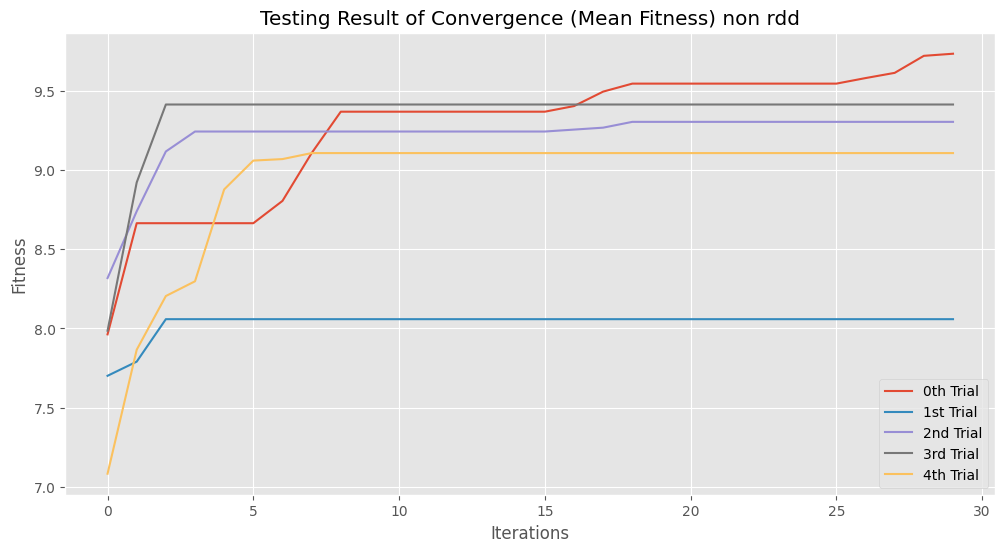

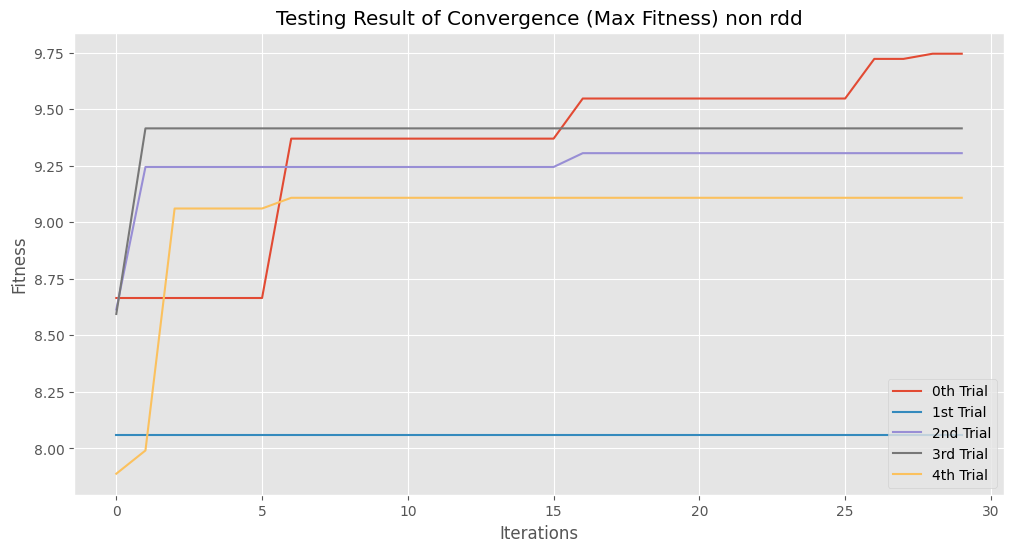

In [ ]:
# Melakukan pengujian konvergensi GA dengan FnMyGA_DLeLM_UjiKonv => sebagai alg. meta-Deep Ai nya +
# Simpan hasil dalam csv dan grafik fitness dlm *.jpg
# 
# nCoba = 10
# IterMaxGA = 500
# pop_size = 50

nCoba = 5
IterMaxGA = 30
pop_size = 5

# get_Gbest_cell =np.zeros((nCoba,),dtype=np.object)
# kesetaraan cell dgn dict
get_all_Gbest_on_cell={}
get_all_FitnessGbest_on_cell={}
get_all_get_y_topi_on_cell={}
get_all_MeanFitness_on_cell={}
get_all_MaxFitness_on_cell={}

# get_best_of_the_best_from_all =np.zeros((nCoba,),dtype=np.object)
get_best_of_the_best_from_all={}

for i in range(nCoba):
  get_all_Gbest_on_cell[i],\
  get_all_FitnessGbest_on_cell[i],\
  get_all_get_y_topi_on_cell[i],\
  get_all_MeanFitness_on_cell[i],\
  get_all_MaxFitness_on_cell[i] = \
  FnMyGA_DLeLM_UjiKonv(IterMaxGA,pop_size,byk_fitur_by_non_rdd,info_minimize_maximize,get_bobot,get_bias,get_output_weight)

  #get best of the best from all Gbest (included Y_topi & fitness nya)
  # get_best_of_the_best_from_all[i]={}
  if i==0:
    get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
    get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
    get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]
  else:
    if(get_best_of_the_best_from_all['FitnessGbest'][0] < get_all_FitnessGbest_on_cell[i]):
      get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
      get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
      get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]

print()
print('Individu terbaik (Gbest) dari semua individu (included Y_topi & fitness nya):')
print('-----'*20)
print('Individu terbaik (Gbest) = ',get_best_of_the_best_from_all['Gbest'].round(2))
print('FitnessGbest = ',get_best_of_the_best_from_all['FitnessGbest'][0].round(2))
print('y_topi = ',get_best_of_the_best_from_all['y_topi'].round(2))

print()

# ---------------------------------------------

# Buat Folder, dgn name_unik_path2save utk simpan hasil style transfer dan total loss-nya
name_unik_path2save = str(datetime.today().astimezone(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S'))
# import os
# os.chdir("/content/drive/My Drive")
if not os.path.exists('./testing of convergence non rdd/'+name_unik_path2save):
  os.makedirs('./testing of convergence non rdd/'+name_unik_path2save)
  #print('Path blm ada')
else:
  print('Path sdh ada')
# os.chdir("/content/drive/My Drive/KeStar_Algorithm")
# !pwd

# set info_param
# nt mewakili parameter nCoba
# it mewakili parameter IterMaxPSO
# po mewakili pop_size
# gyf mewakili best of the best dari Gbest, lalu Y_Topi, lalu Fitness
info_param = 'nt-'+str(nCoba)+'-it-'+str(IterMaxGA)+'-po-' \
+str(pop_size)+'-gyf'

nama_path_hasil = './testing of convergence non rdd/'+name_unik_path2save+'/'
nama_file_jpg_MeanFitness = nama_path_hasil+info_param+'_MeanFitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Mean Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MeanFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MeanFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MeanFitness,dpi=100)
plt.show()

print()

nama_file_jpg_MaxFitness = nama_path_hasil+info_param+'_Maxitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Max Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MaxFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MaxFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MaxFitness,dpi=100)
plt.show()

plt.style.use('default')

# Simpan Hasil Gbest Fitness , nantinya 'MeanFitness' dan 'MaxFitness' utk grafik evaluasi
nama_file_csv_GFY = nama_path_hasil+info_param+'_Gbest_FitnessGbest_Y_Topi.csv'
# np.savetxt(nama_file_csv_GFY, get_best_of_the_best_from_all, fmt="%d", delimiter=",")
# np.savetxt('Gbest_FitnessGbest_Y_Topi.csv', get_best_of_the_best_from_all, fmt="%d", delimiter=",")

nama_file_csv_MeanFitness= nama_path_hasil+info_param+'_MeanFitness.csv'
# np.savetxt(nama_file_csv_MeanFitness, get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MeanFitness.csv', get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")

nama_file_csv_MaxFitness= nama_path_hasil+info_param+'_MaxFitness.csv'
# np.savetxt(nama_file_csv_MaxFitness, get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MaxFitness.csv', get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")

# --------------------------
# untuk Gbest_FitnessGbest_Y_Topi
# keys = sorted(get_best_of_the_best_from_all.keys())
transposed_data = list(zip_longest(*get_best_of_the_best_from_all.values()))
# with open('Gbest_FitnessGbest_Y_Topi.csv', 'w', newline='') as f:
with open(nama_file_csv_GFY, 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerow(get_best_of_the_best_from_all.keys())
  # writer.writerow(keys)
  for items in transposed_data:
    writer.writerow(items)

# untuk MeanFitness
keys = sorted(get_all_MeanFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MeanFitness_on_cell.values()))
# with open('MeanFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MeanFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

# untuk MaxFitness
keys = sorted(get_all_MaxFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MaxFitness_on_cell.values()))
# with open('MaxFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MaxFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)


Gbest [1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.]
FitnessGbest 7.76

get_y_topi =  [0.   0.39 0.44 0.56 0.49 0.   0.82 0.43 0.03 0.23]

Done....! :D 

Gbest [1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.]
FitnessGbest 8.13

get_y_topi =  [0.01 0.25 0.59 0.23 1.   0.21 0.51 0.07 0.02 0.  ]

Done....! :D 

Gbest [0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
FitnessGbest 8.27

get_y_topi =  [0.5  0.23 0.43 0.   0.37 0.42 0.08 0.09 0.23 0.  ]

Done....! :D 

Gbest [0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
FitnessGbest 7.38

get_y_topi =  [0.2  0.47 0.55 0.34 0.39 0.36 0.71 0.52 0.09 0.16]

Done....! :D 

Gbest [0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.]
FitnessGbest 8.58

get_y_topi =  [0.04 0.24 0.16 0.26 0.04 0.02 0.38 0.29 0.14 0.19]

Done....! :D 

Individu terbaik (Gbest) dari semua individu (included Y_topi & fitness nya):
----------------------------------------------------------------------------------------------------
Individu terbaik (Gbest) =  [0. 0. 

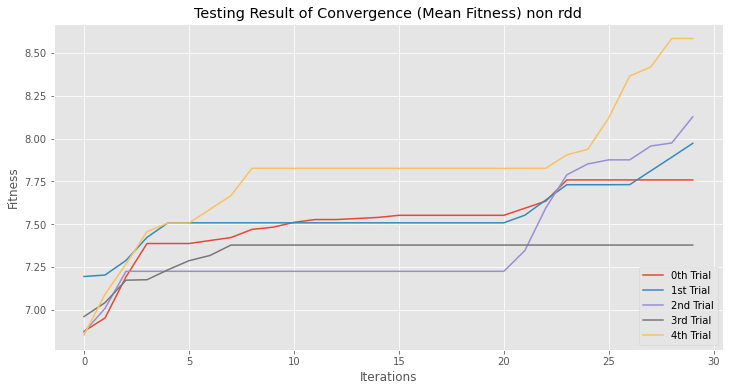

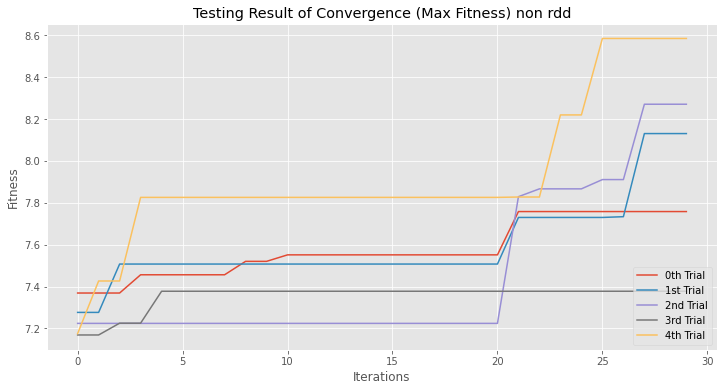

In [ ]:
# Melakukan pengujian konvergensi GA dengan FnMyGA_DLeLM_UjiKonv => sebagai alg. meta-Deep Ai nya +
# Simpan hasil dalam csv dan grafik fitness dlm *.jpg
# 
# nCoba = 10
# IterMaxGA = 500
# pop_size = 50

nCoba = 5
IterMaxGA = 30
pop_size = 5

# get_Gbest_cell =np.zeros((nCoba,),dtype=np.object)
# kesetaraan cell dgn dict
get_all_Gbest_on_cell={}
get_all_FitnessGbest_on_cell={}
get_all_get_y_topi_on_cell={}
get_all_MeanFitness_on_cell={}
get_all_MaxFitness_on_cell={}

# get_best_of_the_best_from_all =np.zeros((nCoba,),dtype=np.object)
get_best_of_the_best_from_all={}

for i in range(nCoba):
  get_all_Gbest_on_cell[i],\
  get_all_FitnessGbest_on_cell[i],\
  get_all_get_y_topi_on_cell[i],\
  get_all_MeanFitness_on_cell[i],\
  get_all_MaxFitness_on_cell[i] = \
  FnMyGA_DLeLM_UjiKonv(IterMaxGA,pop_size,byk_fitur_by_non_rdd,info_minimize_maximize,get_bobot,get_bias,get_output_weight)

  #get best of the best from all Gbest (included Y_topi & fitness nya)
  # get_best_of_the_best_from_all[i]={}
  if i==0:
    get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
    get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
    get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]
  else:
    if(get_best_of_the_best_from_all['FitnessGbest'][0] < get_all_FitnessGbest_on_cell[i]):
      get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
      get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
      get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]

print()
print('Individu terbaik (Gbest) dari semua individu (included Y_topi & fitness nya):')
print('-----'*20)
print('Individu terbaik (Gbest) = ',get_best_of_the_best_from_all['Gbest'].round(2))
print('FitnessGbest = ',get_best_of_the_best_from_all['FitnessGbest'][0].round(2))
print('y_topi = ',get_best_of_the_best_from_all['y_topi'].round(2))

print()

# ---------------------------------------------

# Buat Folder, dgn name_unik_path2save utk simpan hasil style transfer dan total loss-nya
name_unik_path2save = str(datetime.today().astimezone(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S'))
# import os
# os.chdir("/content/drive/My Drive")
if not os.path.exists('./testing of convergence non rdd/'+name_unik_path2save):
  os.makedirs('./testing of convergence non rdd/'+name_unik_path2save)
  #print('Path blm ada')
else:
  print('Path sdh ada')
# os.chdir("/content/drive/My Drive/KeStar_Algorithm")
# !pwd

# set info_param
# nt mewakili parameter nCoba
# it mewakili parameter IterMaxPSO
# po mewakili pop_size
# gyf mewakili best of the best dari Gbest, lalu Y_Topi, lalu Fitness
info_param = 'nt-'+str(nCoba)+'-it-'+str(IterMaxGA)+'-po-' \
+str(pop_size)+'-gyf'

nama_path_hasil = './testing of convergence non rdd/'+name_unik_path2save+'/'
nama_file_jpg_MeanFitness = nama_path_hasil+info_param+'_MeanFitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Mean Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MeanFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MeanFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MeanFitness,dpi=100)
plt.show()

print()

nama_file_jpg_MaxFitness = nama_path_hasil+info_param+'_Maxitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Max Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MaxFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MaxFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MaxFitness,dpi=100)
plt.show()

plt.style.use('default')

# Simpan Hasil Gbest Fitness , nantinya 'MeanFitness' dan 'MaxFitness' utk grafik evaluasi
nama_file_csv_GFY = nama_path_hasil+info_param+'_Gbest_FitnessGbest_Y_Topi.csv'
# np.savetxt(nama_file_csv_GFY, get_best_of_the_best_from_all, fmt="%d", delimiter=",")
# np.savetxt('Gbest_FitnessGbest_Y_Topi.csv', get_best_of_the_best_from_all, fmt="%d", delimiter=",")

nama_file_csv_MeanFitness= nama_path_hasil+info_param+'_MeanFitness.csv'
# np.savetxt(nama_file_csv_MeanFitness, get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MeanFitness.csv', get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")

nama_file_csv_MaxFitness= nama_path_hasil+info_param+'_MaxFitness.csv'
# np.savetxt(nama_file_csv_MaxFitness, get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MaxFitness.csv', get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")

# --------------------------
# untuk Gbest_FitnessGbest_Y_Topi
# keys = sorted(get_best_of_the_best_from_all.keys())
transposed_data = list(zip_longest(*get_best_of_the_best_from_all.values()))
# with open('Gbest_FitnessGbest_Y_Topi.csv', 'w', newline='') as f:
with open(nama_file_csv_GFY, 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerow(get_best_of_the_best_from_all.keys())
  # writer.writerow(keys)
  for items in transposed_data:
    writer.writerow(items)

# untuk MeanFitness
keys = sorted(get_all_MeanFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MeanFitness_on_cell.values()))
# with open('MeanFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MeanFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

# untuk MaxFitness
keys = sorted(get_all_MaxFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MaxFitness_on_cell.values()))
# with open('MaxFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MaxFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)


Gbest [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 

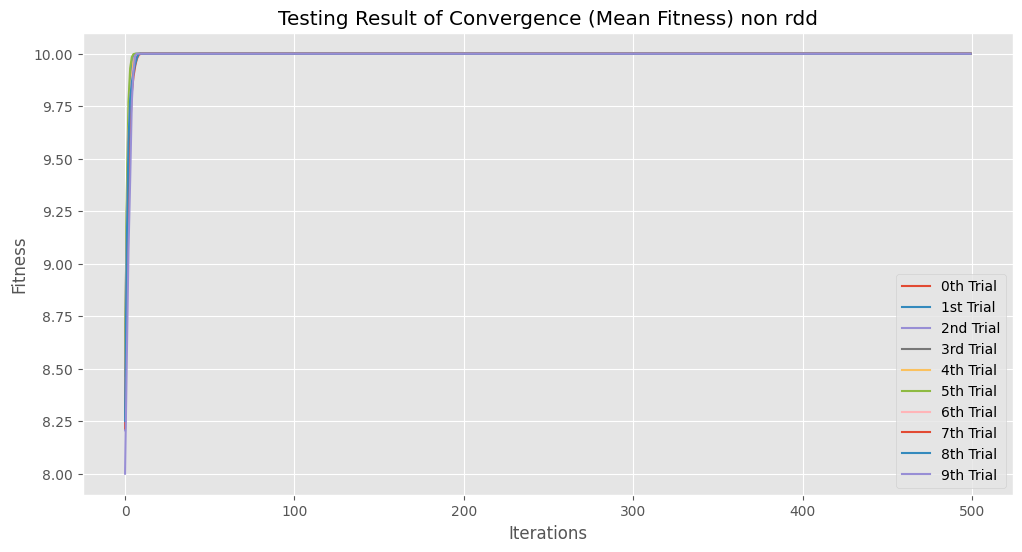

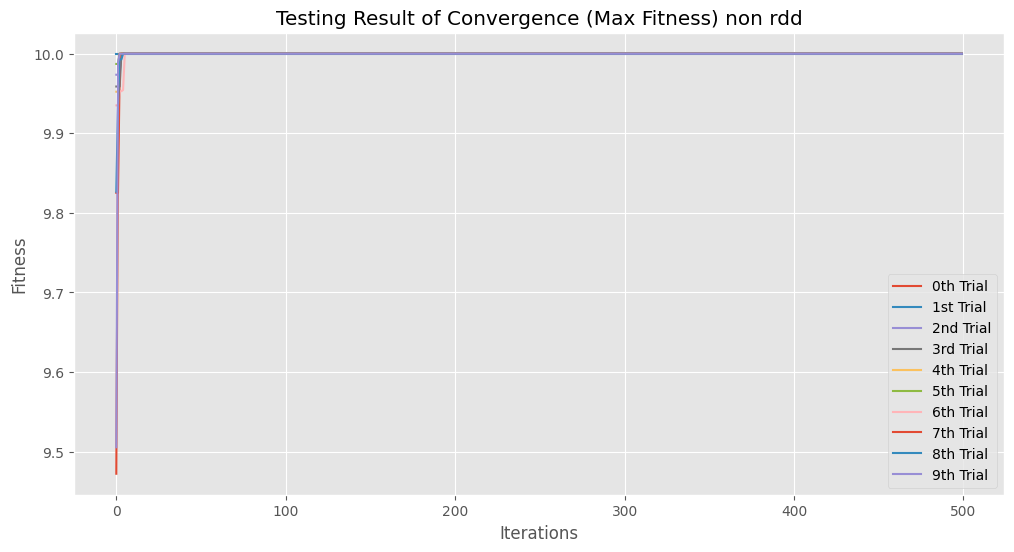

In [ ]:
# Melakukan pengujian konvergensi GA dengan FnMyGA_DLeLM_UjiKonv => sebagai alg. meta-Deep Ai nya +
# Simpan hasil dalam csv dan grafik fitness dlm *.jpg
# 
nCoba = 10
IterMaxGA = 500
pop_size = 50

# nCoba = 5
# IterMaxGA = 30
# pop_size = 5

# get_Gbest_cell =np.zeros((nCoba,),dtype=np.object)
# kesetaraan cell dgn dict
get_all_Gbest_on_cell={}
get_all_FitnessGbest_on_cell={}
get_all_get_y_topi_on_cell={}
get_all_MeanFitness_on_cell={}
get_all_MaxFitness_on_cell={}

# get_best_of_the_best_from_all =np.zeros((nCoba,),dtype=np.object)
get_best_of_the_best_from_all={}

for i in range(nCoba):
  get_all_Gbest_on_cell[i],\
  get_all_FitnessGbest_on_cell[i],\
  get_all_get_y_topi_on_cell[i],\
  get_all_MeanFitness_on_cell[i],\
  get_all_MaxFitness_on_cell[i] = \
  FnMyGA_DLeLM_UjiKonv(IterMaxGA,pop_size,byk_fitur_by_non_rdd,info_minimize_maximize,get_bobot,get_bias,get_output_weight)

  #get best of the best from all Gbest (included Y_topi & fitness nya)
  # get_best_of_the_best_from_all[i]={}
  if i==0:
    get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
    get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
    get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]
  else:
    if(get_best_of_the_best_from_all['FitnessGbest'][0] < get_all_FitnessGbest_on_cell[i]):
      get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
      get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
      get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]

print()
print('Individu terbaik (Gbest) dari semua individu (included Y_topi & fitness nya):')
print('-----'*20)
print('Individu terbaik (Gbest) = ',get_best_of_the_best_from_all['Gbest'].round(2))
print('FitnessGbest = ',get_best_of_the_best_from_all['FitnessGbest'][0].round(2))
print('y_topi = ',get_best_of_the_best_from_all['y_topi'].round(2))

print()

# ---------------------------------------------

# Buat Folder, dgn name_unik_path2save utk simpan hasil style transfer dan total loss-nya
name_unik_path2save = str(datetime.today().astimezone(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S'))
# import os
# os.chdir("/content/drive/My Drive")
if not os.path.exists('./testing of convergence non rdd/'+name_unik_path2save):
  os.makedirs('./testing of convergence non rdd/'+name_unik_path2save)
  #print('Path blm ada')
else:
  print('Path sdh ada')
# os.chdir("/content/drive/My Drive/KeStar_Algorithm")
# !pwd

# set info_param
# nt mewakili parameter nCoba
# it mewakili parameter IterMaxPSO
# po mewakili pop_size
# gyf mewakili best of the best dari Gbest, lalu Y_Topi, lalu Fitness
info_param = 'nt-'+str(nCoba)+'-it-'+str(IterMaxGA)+'-po-' \
+str(pop_size)+'-gyf'

nama_path_hasil = './testing of convergence non rdd/'+name_unik_path2save+'/'
nama_file_jpg_MeanFitness = nama_path_hasil+info_param+'_MeanFitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Mean Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MeanFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MeanFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MeanFitness,dpi=100)
plt.show()

print()

nama_file_jpg_MaxFitness = nama_path_hasil+info_param+'_Maxitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Max Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MaxFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MaxFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MaxFitness,dpi=100)
plt.show()

plt.style.use('default')

# Simpan Hasil Gbest Fitness , nantinya 'MeanFitness' dan 'MaxFitness' utk grafik evaluasi
nama_file_csv_GFY = nama_path_hasil+info_param+'_Gbest_FitnessGbest_Y_Topi.csv'
# np.savetxt(nama_file_csv_GFY, get_best_of_the_best_from_all, fmt="%d", delimiter=",")
# np.savetxt('Gbest_FitnessGbest_Y_Topi.csv', get_best_of_the_best_from_all, fmt="%d", delimiter=",")

nama_file_csv_MeanFitness= nama_path_hasil+info_param+'_MeanFitness.csv'
# np.savetxt(nama_file_csv_MeanFitness, get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MeanFitness.csv', get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")

nama_file_csv_MaxFitness= nama_path_hasil+info_param+'_MaxFitness.csv'
# np.savetxt(nama_file_csv_MaxFitness, get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MaxFitness.csv', get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")

# --------------------------
# untuk Gbest_FitnessGbest_Y_Topi
# keys = sorted(get_best_of_the_best_from_all.keys())
transposed_data = list(zip_longest(*get_best_of_the_best_from_all.values()))
# with open('Gbest_FitnessGbest_Y_Topi.csv', 'w', newline='') as f:
with open(nama_file_csv_GFY, 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerow(get_best_of_the_best_from_all.keys())
  # writer.writerow(keys)
  for items in transposed_data:
    writer.writerow(items)

# untuk MeanFitness
keys = sorted(get_all_MeanFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MeanFitness_on_cell.values()))
# with open('MeanFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MeanFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

# untuk MaxFitness
keys = sorted(get_all_MaxFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MaxFitness_on_cell.values()))
# with open('MaxFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MaxFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)


Gbest [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
FitnessGbest 9.75

get_y_topi =  [0.07 0.   0.   0.   0.01 0.   0.   0.   0.23 0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
FitnessGbest 9.75

get_y_topi =  [0.07 0.   0.   0.   0.01 0.   0.   0.   0.23 0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
FitnessGbest 9.75

get_y_topi =  [0.07 0.   0.   0.   0.01 0.   0.   0.   0.23 0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
FitnessGbest 9.75

get_y_topi =  [0.07 0.   0.   0.   0.01 0.   0.   0.   0.23 0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
FitnessGbest 9.75

get_y_topi =  [0.07 0.   0.   0.   0.01 0.   0.   0.   0.23 0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
FitnessGbest 9.75

get_y_topi =  [0.07 0.   0.   0.   0.01 0.   0.   0.   0.23 0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
F

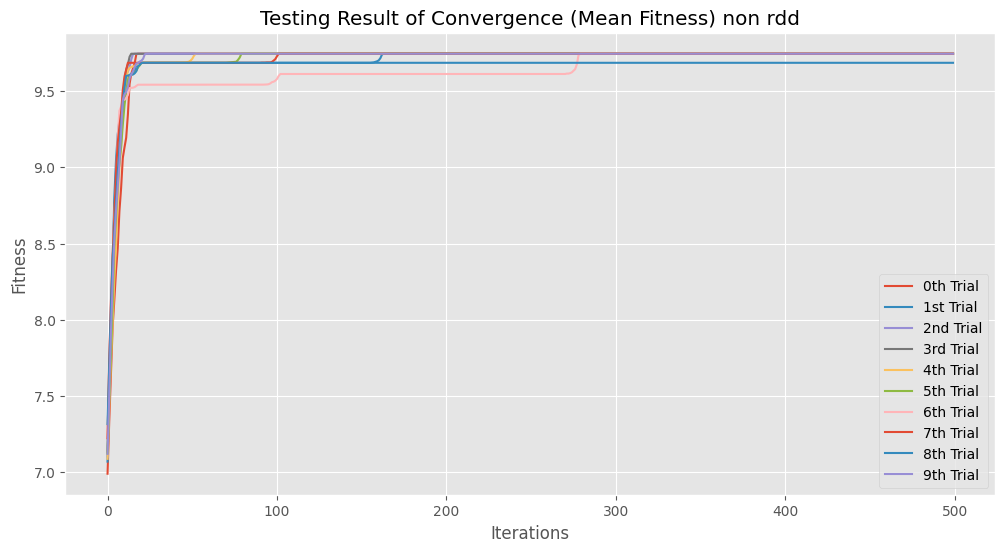

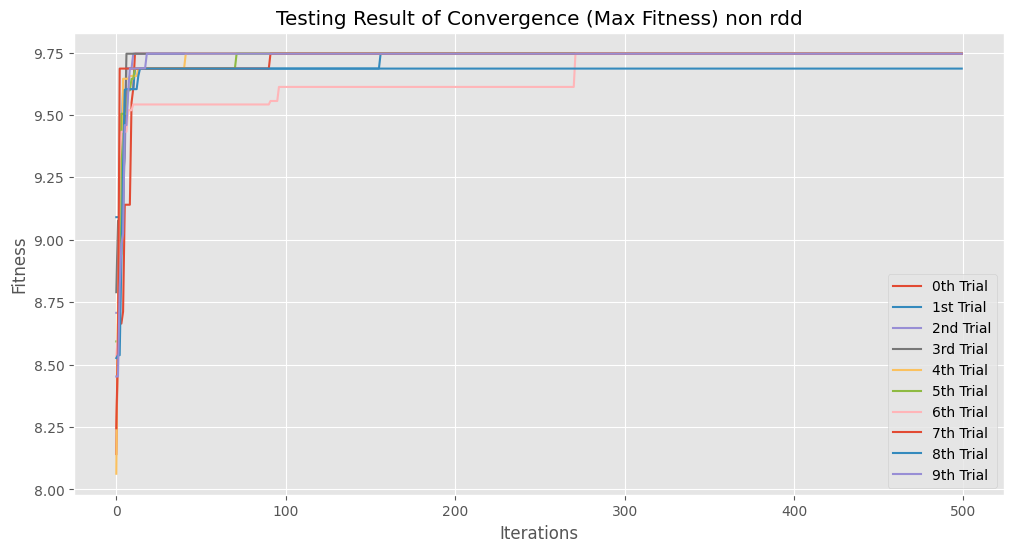

In [ ]:
# Melakukan pengujian konvergensi GA dengan FnMyGA_DLeLM_UjiKonv => sebagai alg. meta-Deep Ai nya +
# Simpan hasil dalam csv dan grafik fitness dlm *.jpg
# 
nCoba = 10
IterMaxGA = 500
pop_size = 50

# nCoba = 5
# IterMaxGA = 30
# pop_size = 5

# get_Gbest_cell =np.zeros((nCoba,),dtype=np.object)
# kesetaraan cell dgn dict
get_all_Gbest_on_cell={}
get_all_FitnessGbest_on_cell={}
get_all_get_y_topi_on_cell={}
get_all_MeanFitness_on_cell={}
get_all_MaxFitness_on_cell={}

# get_best_of_the_best_from_all =np.zeros((nCoba,),dtype=np.object)
get_best_of_the_best_from_all={}

for i in range(nCoba):
  get_all_Gbest_on_cell[i],\
  get_all_FitnessGbest_on_cell[i],\
  get_all_get_y_topi_on_cell[i],\
  get_all_MeanFitness_on_cell[i],\
  get_all_MaxFitness_on_cell[i] = \
  FnMyGA_DLeLM_UjiKonv(IterMaxGA,pop_size,byk_fitur_by_non_rdd,info_minimize_maximize,get_bobot,get_bias,get_output_weight)

  #get best of the best from all Gbest (included Y_topi & fitness nya)
  # get_best_of_the_best_from_all[i]={}
  if i==0:
    get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
    get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
    get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]
  else:
    if(get_best_of_the_best_from_all['FitnessGbest'][0] < get_all_FitnessGbest_on_cell[i]):
      get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
      get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
      get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]

print()
print('Individu terbaik (Gbest) dari semua individu (included Y_topi & fitness nya):')
print('-----'*20)
print('Individu terbaik (Gbest) = ',get_best_of_the_best_from_all['Gbest'].round(2))
print('FitnessGbest = ',get_best_of_the_best_from_all['FitnessGbest'][0].round(2))
print('y_topi = ',get_best_of_the_best_from_all['y_topi'].round(2))

print()

# ---------------------------------------------

# Buat Folder, dgn name_unik_path2save utk simpan hasil style transfer dan total loss-nya
name_unik_path2save = str(datetime.today().astimezone(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S'))
# import os
# os.chdir("/content/drive/My Drive")
if not os.path.exists('./testing of convergence non rdd/'+name_unik_path2save):
  os.makedirs('./testing of convergence non rdd/'+name_unik_path2save)
  #print('Path blm ada')
else:
  print('Path sdh ada')
# os.chdir("/content/drive/My Drive/KeStar_Algorithm")
# !pwd

# set info_param
# nt mewakili parameter nCoba
# it mewakili parameter IterMaxPSO
# po mewakili pop_size
# gyf mewakili best of the best dari Gbest, lalu Y_Topi, lalu Fitness
info_param = 'nt-'+str(nCoba)+'-it-'+str(IterMaxGA)+'-po-' \
+str(pop_size)+'-gyf'

nama_path_hasil = './testing of convergence non rdd/'+name_unik_path2save+'/'
nama_file_jpg_MeanFitness = nama_path_hasil+info_param+'_MeanFitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Mean Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MeanFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MeanFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MeanFitness,dpi=100)
plt.show()

print()

nama_file_jpg_MaxFitness = nama_path_hasil+info_param+'_Maxitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Max Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MaxFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MaxFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MaxFitness,dpi=100)
plt.show()

plt.style.use('default')

# Simpan Hasil Gbest Fitness , nantinya 'MeanFitness' dan 'MaxFitness' utk grafik evaluasi
nama_file_csv_GFY = nama_path_hasil+info_param+'_Gbest_FitnessGbest_Y_Topi.csv'
# np.savetxt(nama_file_csv_GFY, get_best_of_the_best_from_all, fmt="%d", delimiter=",")
# np.savetxt('Gbest_FitnessGbest_Y_Topi.csv', get_best_of_the_best_from_all, fmt="%d", delimiter=",")

nama_file_csv_MeanFitness= nama_path_hasil+info_param+'_MeanFitness.csv'
# np.savetxt(nama_file_csv_MeanFitness, get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MeanFitness.csv', get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")

nama_file_csv_MaxFitness= nama_path_hasil+info_param+'_MaxFitness.csv'
# np.savetxt(nama_file_csv_MaxFitness, get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MaxFitness.csv', get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")

# --------------------------
# untuk Gbest_FitnessGbest_Y_Topi
# keys = sorted(get_best_of_the_best_from_all.keys())
transposed_data = list(zip_longest(*get_best_of_the_best_from_all.values()))
# with open('Gbest_FitnessGbest_Y_Topi.csv', 'w', newline='') as f:
with open(nama_file_csv_GFY, 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerow(get_best_of_the_best_from_all.keys())
  # writer.writerow(keys)
  for items in transposed_data:
    writer.writerow(items)

# untuk MeanFitness
keys = sorted(get_all_MeanFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MeanFitness_on_cell.values()))
# with open('MeanFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MeanFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

# untuk MaxFitness
keys = sorted(get_all_MaxFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MaxFitness_on_cell.values()))
# with open('MaxFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MaxFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

### Dengan Adaptive Cr dan Mr | Based Geometric Time Variant


Gbest [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.]
FitnessGbest 9.99

get_y_topi =  [0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.]
FitnessGbest 9.99

get_y_topi =  [0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 

Gbest [0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
FitnessGbest 10.0

get_y_topi =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Done....! :D 



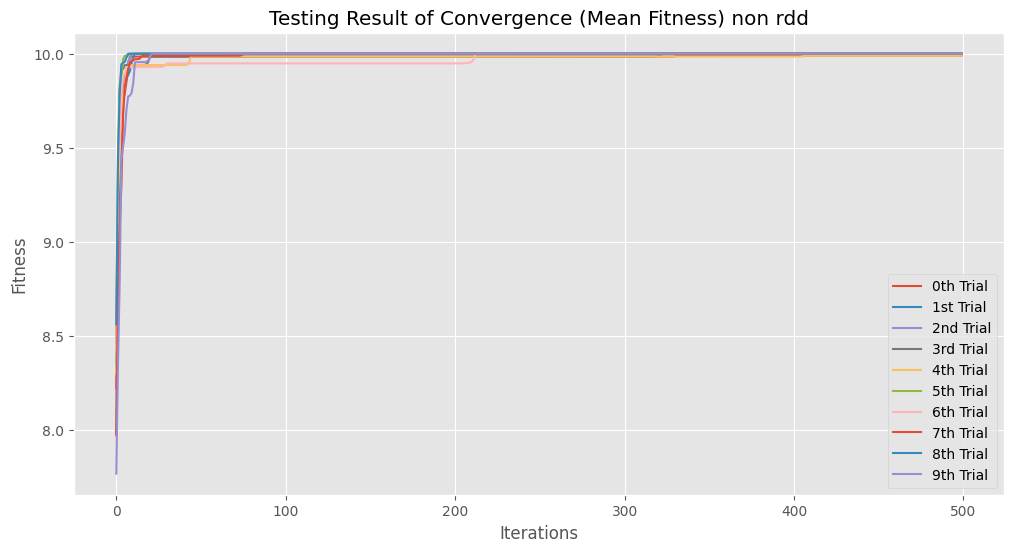

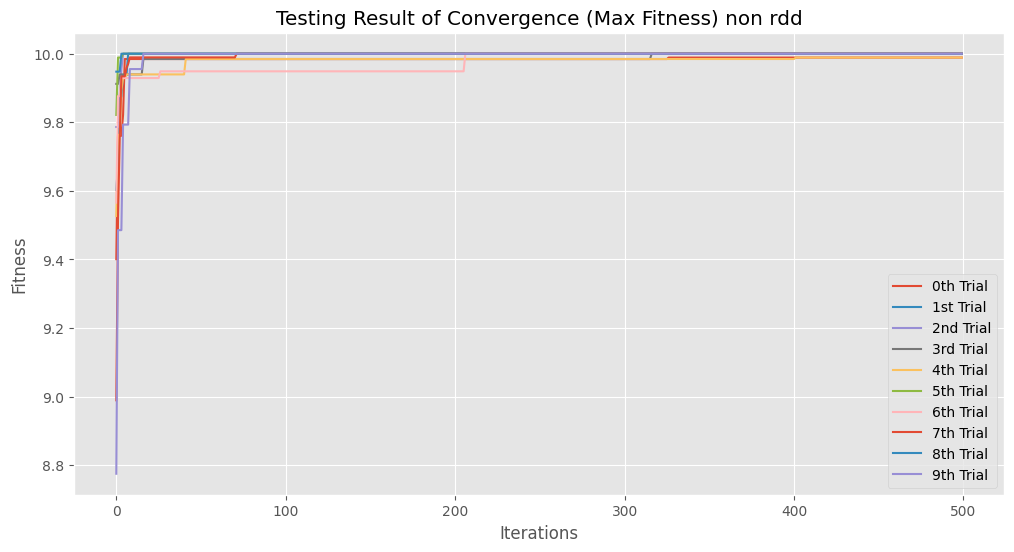

In [ ]:
# Melakukan pengujian konvergensi GA dengan FnMyGA_DLeLM_UjiKonv => sebagai alg. meta-Deep Ai nya +
# Simpan hasil dalam csv dan grafik fitness dlm *.jpg
# 
nCoba = 10
IterMaxGA = 500
pop_size = 50

# nCoba = 5
# IterMaxGA = 30
# pop_size = 5

# get_Gbest_cell =np.zeros((nCoba,),dtype=np.object)
# kesetaraan cell dgn dict
get_all_Gbest_on_cell={}
get_all_FitnessGbest_on_cell={}
get_all_get_y_topi_on_cell={}
get_all_MeanFitness_on_cell={}
get_all_MaxFitness_on_cell={}

# get_best_of_the_best_from_all =np.zeros((nCoba,),dtype=np.object)
get_best_of_the_best_from_all={}

for i in range(nCoba):
  get_all_Gbest_on_cell[i],\
  get_all_FitnessGbest_on_cell[i],\
  get_all_get_y_topi_on_cell[i],\
  get_all_MeanFitness_on_cell[i],\
  get_all_MaxFitness_on_cell[i] = \
  FnMyGA_DLeLM_UjiKonv(IterMaxGA,pop_size,byk_fitur_by_non_rdd,info_minimize_maximize,get_bobot,get_bias,get_output_weight)

  #get best of the best from all Gbest (included Y_topi & fitness nya)
  # get_best_of_the_best_from_all[i]={}
  if i==0:
    get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
    get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
    get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]
  else:
    if(get_best_of_the_best_from_all['FitnessGbest'][0] < get_all_FitnessGbest_on_cell[i]):
      get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
      get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
      get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]

print()
print('Individu terbaik (Gbest) dari semua individu (included Y_topi & fitness nya):')
print('-----'*20)
print('Individu terbaik (Gbest) = ',get_best_of_the_best_from_all['Gbest'].round(2))
print('FitnessGbest = ',get_best_of_the_best_from_all['FitnessGbest'][0].round(2))
print('y_topi = ',get_best_of_the_best_from_all['y_topi'].round(2))

print()

# ---------------------------------------------

# Buat Folder, dgn name_unik_path2save utk simpan hasil style transfer dan total loss-nya
name_unik_path2save = str(datetime.today().astimezone(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S'))
# import os
# os.chdir("/content/drive/My Drive")
if not os.path.exists('./testing of convergence non rdd/'+name_unik_path2save):
  os.makedirs('./testing of convergence non rdd/'+name_unik_path2save)
  #print('Path blm ada')
else:
  print('Path sdh ada')
# os.chdir("/content/drive/My Drive/KeStar_Algorithm")
# !pwd

# set info_param
# nt mewakili parameter nCoba
# it mewakili parameter IterMaxPSO
# po mewakili pop_size
# gyf mewakili best of the best dari Gbest, lalu Y_Topi, lalu Fitness
info_param = 'nt-'+str(nCoba)+'-it-'+str(IterMaxGA)+'-po-' \
+str(pop_size)+'-gyf'

nama_path_hasil = './testing of convergence non rdd/'+name_unik_path2save+'/'
nama_file_jpg_MeanFitness = nama_path_hasil+info_param+'_MeanFitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Mean Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MeanFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MeanFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MeanFitness,dpi=100)
plt.show()

print()

nama_file_jpg_MaxFitness = nama_path_hasil+info_param+'_Maxitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Max Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MaxFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MaxFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MaxFitness,dpi=100)
plt.show()

plt.style.use('default')

# Simpan Hasil Gbest Fitness , nantinya 'MeanFitness' dan 'MaxFitness' utk grafik evaluasi
nama_file_csv_GFY = nama_path_hasil+info_param+'_Gbest_FitnessGbest_Y_Topi.csv'
# np.savetxt(nama_file_csv_GFY, get_best_of_the_best_from_all, fmt="%d", delimiter=",")
# np.savetxt('Gbest_FitnessGbest_Y_Topi.csv', get_best_of_the_best_from_all, fmt="%d", delimiter=",")

nama_file_csv_MeanFitness= nama_path_hasil+info_param+'_MeanFitness.csv'
# np.savetxt(nama_file_csv_MeanFitness, get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MeanFitness.csv', get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")

nama_file_csv_MaxFitness= nama_path_hasil+info_param+'_MaxFitness.csv'
# np.savetxt(nama_file_csv_MaxFitness, get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MaxFitness.csv', get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")

# --------------------------
# untuk Gbest_FitnessGbest_Y_Topi
# keys = sorted(get_best_of_the_best_from_all.keys())
transposed_data = list(zip_longest(*get_best_of_the_best_from_all.values()))
# with open('Gbest_FitnessGbest_Y_Topi.csv', 'w', newline='') as f:
with open(nama_file_csv_GFY, 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerow(get_best_of_the_best_from_all.keys())
  # writer.writerow(keys)
  for items in transposed_data:
    writer.writerow(items)

# untuk MeanFitness
keys = sorted(get_all_MeanFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MeanFitness_on_cell.values()))
# with open('MeanFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MeanFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

# untuk MaxFitness
keys = sorted(get_all_MaxFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MaxFitness_on_cell.values()))
# with open('MaxFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MaxFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

### Dengan Adaptive Cr dan Mr | Based Arithmatic Time Variant dasar


Gbest [1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
FitnessGbest 9.94

get_y_topi =  [0.   0.   0.   0.06 0.   0.   0.   0.   0.   0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
FitnessGbest 9.95

get_y_topi =  [0.   0.   0.   0.03 0.   0.   0.   0.   0.02 0.  ]

Done....! :D 

Gbest [1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
FitnessGbest 9.94

get_y_topi =  [0.   0.   0.   0.06 0.   0.   0.   0.   0.   0.  ]

Done....! :D 

Gbest [1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
FitnessGbest 9.94

get_y_topi =  [0.   0.   0.   0.06 0.   0.   0.   0.   0.   0.  ]

Done....! :D 

Gbest [1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
FitnessGbest 9.94

get_y_topi =  [0.   0.   0.   0.06 0.   0.   0.   0.   0.   0.  ]

Done....! :D 

Gbest [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
FitnessGbest 9.95

get_y_topi =  [0.   0.   0.   0.03 0.   0.   0.   0.   0.02 0.  ]

Done....! :D 

Gbest [1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
F

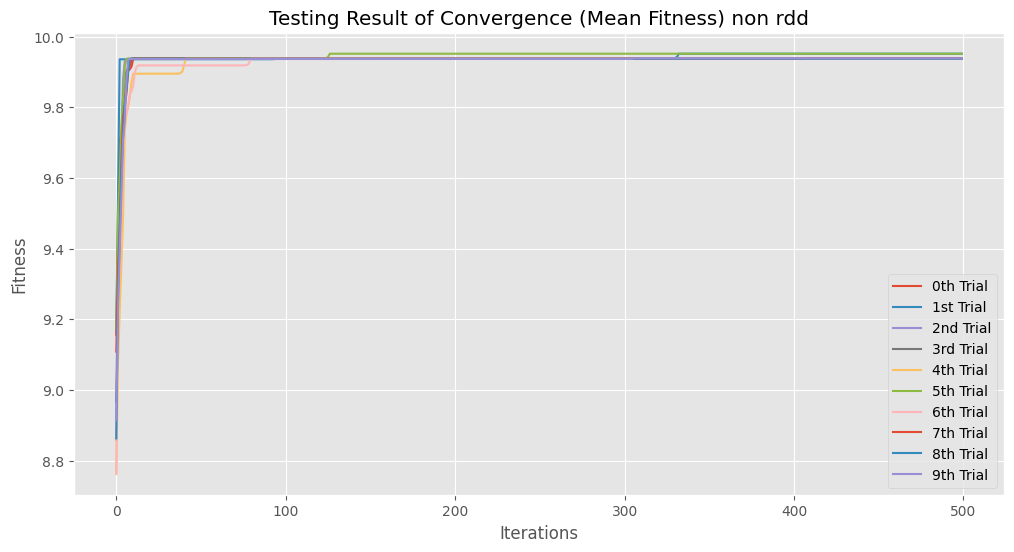

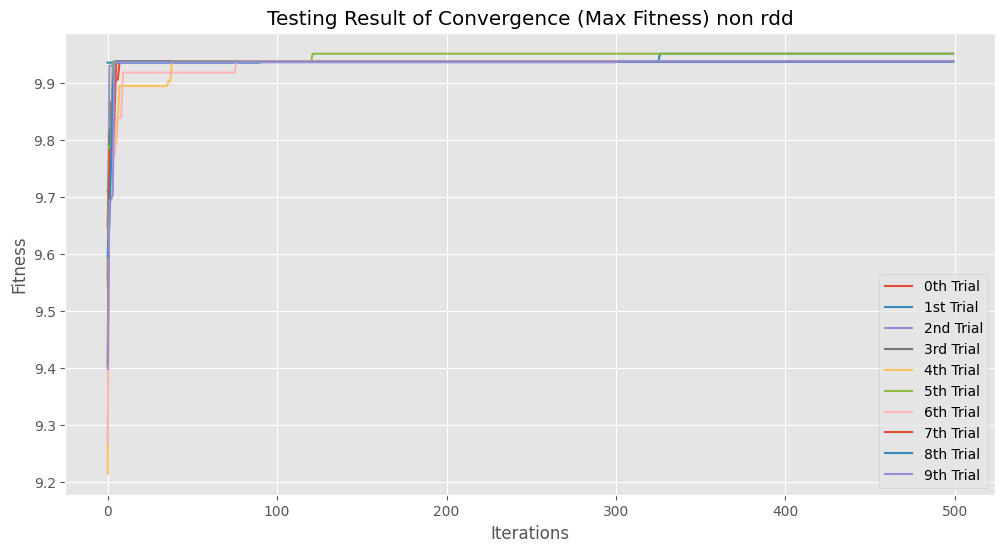

In [ ]:
# Melakukan pengujian konvergensi GA dengan FnMyGA_DLeLM_UjiKonv => sebagai alg. meta-Deep Ai nya +
# Simpan hasil dalam csv dan grafik fitness dlm *.jpg
# 
nCoba = 10
IterMaxGA = 500
pop_size = 50

# nCoba = 5
# IterMaxGA = 30
# pop_size = 5

# get_Gbest_cell =np.zeros((nCoba,),dtype=np.object)
# kesetaraan cell dgn dict
get_all_Gbest_on_cell={}
get_all_FitnessGbest_on_cell={}
get_all_get_y_topi_on_cell={}
get_all_MeanFitness_on_cell={}
get_all_MaxFitness_on_cell={}

# get_best_of_the_best_from_all =np.zeros((nCoba,),dtype=np.object)
get_best_of_the_best_from_all={}

for i in range(nCoba):
  get_all_Gbest_on_cell[i],\
  get_all_FitnessGbest_on_cell[i],\
  get_all_get_y_topi_on_cell[i],\
  get_all_MeanFitness_on_cell[i],\
  get_all_MaxFitness_on_cell[i] = \
  FnMyGA_DLeLM_UjiKonv(IterMaxGA,pop_size,byk_fitur_by_non_rdd,info_minimize_maximize,get_bobot,get_bias,get_output_weight)

  #get best of the best from all Gbest (included Y_topi & fitness nya)
  # get_best_of_the_best_from_all[i]={}
  if i==0:
    get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
    get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
    get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]
  else:
    if(get_best_of_the_best_from_all['FitnessGbest'][0] < get_all_FitnessGbest_on_cell[i]):
      get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
      get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
      get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i]

print()
print('Individu terbaik (Gbest) dari semua individu (included Y_topi & fitness nya):')
print('-----'*20)
print('Individu terbaik (Gbest) = ',get_best_of_the_best_from_all['Gbest'].round(2))
print('FitnessGbest = ',get_best_of_the_best_from_all['FitnessGbest'][0].round(2))
print('y_topi = ',get_best_of_the_best_from_all['y_topi'].round(2))

print()

# ---------------------------------------------

# Buat Folder, dgn name_unik_path2save utk simpan hasil style transfer dan total loss-nya
name_unik_path2save = str(datetime.today().astimezone(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S'))
# import os
# os.chdir("/content/drive/My Drive")
if not os.path.exists('./testing of convergence non rdd/'+name_unik_path2save):
  os.makedirs('./testing of convergence non rdd/'+name_unik_path2save)
  #print('Path blm ada')
else:
  print('Path sdh ada')
# os.chdir("/content/drive/My Drive/KeStar_Algorithm")
# !pwd

# set info_param
# nt mewakili parameter nCoba
# it mewakili parameter IterMaxPSO
# po mewakili pop_size
# gyf mewakili best of the best dari Gbest, lalu Y_Topi, lalu Fitness
info_param = 'nt-'+str(nCoba)+'-it-'+str(IterMaxGA)+'-po-' \
+str(pop_size)+'-gyf'

nama_path_hasil = './testing of convergence non rdd/'+name_unik_path2save+'/'
nama_file_jpg_MeanFitness = nama_path_hasil+info_param+'_MeanFitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Mean Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MeanFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MeanFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MeanFitness,dpi=100)
plt.show()

print()

nama_file_jpg_MaxFitness = nama_path_hasil+info_param+'_Maxitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Max Fitness) non rdd")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MaxFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MaxFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MaxFitness,dpi=100)
plt.show()

plt.style.use('default')

# Simpan Hasil Gbest Fitness , nantinya 'MeanFitness' dan 'MaxFitness' utk grafik evaluasi
nama_file_csv_GFY = nama_path_hasil+info_param+'_Gbest_FitnessGbest_Y_Topi.csv'
# np.savetxt(nama_file_csv_GFY, get_best_of_the_best_from_all, fmt="%d", delimiter=",")
# np.savetxt('Gbest_FitnessGbest_Y_Topi.csv', get_best_of_the_best_from_all, fmt="%d", delimiter=",")

nama_file_csv_MeanFitness= nama_path_hasil+info_param+'_MeanFitness.csv'
# np.savetxt(nama_file_csv_MeanFitness, get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MeanFitness.csv', get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")

nama_file_csv_MaxFitness= nama_path_hasil+info_param+'_MaxFitness.csv'
# np.savetxt(nama_file_csv_MaxFitness, get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MaxFitness.csv', get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")

# --------------------------
# untuk Gbest_FitnessGbest_Y_Topi
# keys = sorted(get_best_of_the_best_from_all.keys())
transposed_data = list(zip_longest(*get_best_of_the_best_from_all.values()))
# with open('Gbest_FitnessGbest_Y_Topi.csv', 'w', newline='') as f:
with open(nama_file_csv_GFY, 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerow(get_best_of_the_best_from_all.keys())
  # writer.writerow(keys)
  for items in transposed_data:
    writer.writerow(items)

# untuk MeanFitness
keys = sorted(get_all_MeanFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MeanFitness_on_cell.values()))
# with open('MeanFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MeanFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

# untuk MaxFitness
keys = sorted(get_all_MaxFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MaxFitness_on_cell.values()))
# with open('MaxFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MaxFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

Semoga Bermanfaat. Aamiin. :D
![]( https://docs.google.com/uc?export=download&id=1vJNmuncRehLc3WCZkFYCU6rRMVTy-w0k)